In [1]:
import random
import numpy as np
import tensorflow as tf
import mlflow.keras

from ml_investing_wne import config
from ml_investing_wne.utils import get_logger
from ml_investing_wne.experiment_factory import create_asset, experiment_factory

random.seed(config.seed)
np.random.seed(config.seed)
tf.random.set_seed(config.seed)

2023-07-01 15:14:46.095356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 15:14:47.761879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


SyntaxError: invalid syntax (resnet_lstm_regularized.py, line 74)

In [3]:
len(tf.config.list_physical_devices('GPU')) > 0

True

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


2023-07-01 13:20:17.049325: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:20:20.595305: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-01 13:20:20.595517: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

In [4]:
config.currency = 'MATICUSDT'

In [5]:
asset = create_asset()
experiment = experiment_factory(asset).get_experiment()

In [6]:
experiment.df


,open,high,low,close,volume,y_pred,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_15,EMA_15,VAR_15,SMA_20,EMA_20,VAR_20,SMA_50,EMA_50,VAR_50,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-01 04:05:00,0.00413,0.00414,0.00412,0.00413,706777.8,1.000000,0.004138,0.004139,3.200000e-10,0.004156,0.004167,8.266667e-10,0.004195,0.004200,4.498095e-09,0.004242,0.004232,1.041684e-08,0.004401,0.004401,2.351596e-08,-0.000084,-3.428076e-06,-0.000081,21.338832,17.690571,14.160706,11.186371,8.805419,-87.500000,0.004106,0.004138,0.004170,1.546641e+00,0.375000,0.000000,4,2,8.878852e-01,0.460065,0.866025,-0.5
2019-05-01 04:10:00,0.00413,0.00414,0.00413,0.00413,243409.8,1.009685,0.004130,0.004136,0.000000e+00,0.004147,0.004161,3.566667e-10,0.004181,0.004192,3.078095e-09,0.004229,0.004222,9.910263e-09,0.004395,0.004390,2.497653e-08,-0.000082,-9.835896e-07,-0.000081,21.338832,17.690571,14.160706,12.283550,10.163208,-86.363636,0.004130,0.004130,0.004130,5.376383e-12,1.000000,0.000000,4,2,8.878852e-01,0.460065,0.866025,-0.5
2019-05-01 04:15:00,0.00414,0.00417,0.00414,0.00417,2224680.4,1.000000,0.004138,0.004147,3.200000e-10,0.004147,0.004162,3.566667e-10,0.004173,0.004189,2.163810e-09,0.004220,0.004217,8.952368e-09,0.004389,0.004381,2.591596e-08,-0.000076,3.891523e-06,-0.000080,33.385642,36.736616,51.828697,20.992823,14.820915,-63.157895,0.004106,0.004138,0.004170,1.546641e+00,1.000000,0.009685,4,2,8.878852e-01,0.460065,0.866025,-0.5
2019-05-01 04:20:00,0.00417,0.00419,0.00416,0.00417,5221026.8,0.997602,0.004146,0.004155,4.800000e-10,0.004149,0.004164,4.100000e-10,0.004165,0.004187,1.112381e-09,0.004208,0.004213,7.423947e-09,0.004384,0.004373,2.683710e-08,-0.000071,7.472968e-06,-0.000078,33.385642,36.736616,51.828697,31.409490,21.561954,-56.250000,0.004107,0.004146,0.004185,1.890585e+00,0.806186,0.000000,4,2,8.878852e-01,0.460065,0.866025,-0.5
2019-05-01 04:25:00,0.00418,0.00418,0.00414,0.00416,4463862.2,1.000000,0.004152,0.004157,4.200000e-10,0.004149,0.004163,4.100000e-10,0.004161,0.004183,8.780952e-10,0.004196,0.004208,5.466053e-09,0.004378,0.004365,2.763384e-08,-0.000066,9.400613e-06,-0.000076,31.966218,34.287834,44.758038,41.149749,31.184021,-57.142857,0.004115,0.004152,0.004189,1.765925e+00,0.609109,-0.002398,4,2,8.878852e-01,0.460065,0.866025,-0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-31 23:25:00,1.12010,1.12140,1.12010,1.12070,336542.4,0.998126,1.119260,1.119773,1.783000e-06,1.119510,1.119564,2.281000e-06,1.119893,1.119402,2.040667e-06,1.119500,1.119090,2.172631e-06,1.116018,1.116035,2.002396e-05,0.000950,-2.922897e-04,0.001242,59.029085,59.805571,65.117830,50.769231,37.516340,-41.538462,1.116871,1.119260,1.121649,4.268248e-01,0.801427,0.000446,23,4,-2.449294e-16,1.000000,-0.866025,-0.5
2023-03-31 23:30:00,1.12060,1.12130,1.11850,1.11860,274674.2,1.001877,1.119420,1.119382,1.327000e-06,1.119160,1.119389,1.491556e-06,1.119767,1.119302,2.116667e-06,1.119440,1.119044,2.206737e-06,1.116244,1.116136,1.855680e-05,0.000807,-3.485011e-04,0.001155,50.459230,47.161133,42.067296,45.128205,44.102564,-73.846154,1.117359,1.119420,1.121481,3.681691e-01,0.301037,-0.001874,23,4,-2.449294e-16,1.000000,-0.866025,-0.5
2023-03-31 23:35:00,1.11870,1.12110,1.11860,1.12070,110034.5,0.997948,1.119980,1.119821,7.670001e-07,1.119150,1.119627,1.456111e-06,1.119807,1.119476,2.169238e-06,1.119560,1.119201,2.206737e-06,1.116482,1.116315,1.777334e-05,0.000853,-2.419774e-04,0.001095,57.157557,57.212634,59.339145,47.692308,47.863248,-41.538462,1.118413,1.119980,1.121547,2.797644e-01,0.729789,0.001877,23,4,-2.449294e-16,1.000000,-0.866025,-0.5


In [6]:
config.currency = 'BTCUSDT'
btc = create_asset()
experiment_btc = experiment_factory(btc).get_experiment()
experiment_btc.df.rename(columns={'close':'close_btc', 'volume':'volume_btc', 'roc_1': 'roc_1_btc'}, inplace=True)
# experiment.df =  experiment.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment.df =  experiment.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,close_btc,volume_btc,roc_1_btc
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-02 09:00:00,0.00445,0.00449,0.00428,0.00434,14439013.5,1.0,0.004427,0.004402,6.033333e-09,0.00447,0.00441,7.150000e-09,0.004372,0.00438,1.432889e-08,0.00434,0.004362,1.565000e-08,0.004298,0.004334,1.412211e-08,0.00005,0.000024,0.000026,50.156909,49.810634,45.056809,55.555556,64.132554,-59.649123,0.004319,0.00447,0.004621,6.767846,0.07028,0.975281,9,3,0.631088,-0.775711,1.224647e-16,-1.0,5422.87,1950.77849,0.995373


In [5]:
config.currency = 'BTCUSDT'
btc = create_asset()
experiment_btc = experiment_factory(btc).get_experiment()


In [10]:
experiment_btc.df.to_csv('BTCUSDT_60min.csv')

In [4]:
experiment_btc.df.rename(columns={'close':'close_btc', 'volume':'volume_btc', 'roc_1': 'roc_1_btc'}, inplace=True)
# experiment.df =  experiment.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment.df =  experiment.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment.df.head(1)

NameError: name 'experiment_btc' is not defined

In [7]:
config.currency = 'ETHUSDT'
eth = create_asset()
experiment_eth = experiment_factory(eth).get_experiment()
experiment_eth.df.rename(columns={'close':'close_eth', 'volume':'volume_eth', 'roc_1': 'roc_1_eth'}, inplace=True)
# experiment.df = experiment.df[['close', 'volume', 'roc_1','y_pred', 'close_btc', 'volume_btc','roc_1_btc']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment.df = experiment.df.merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,close_btc,volume_btc,roc_1_btc,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-05-02 09:00:00,0.00445,0.00449,0.00428,0.00434,14439013.5,1.0,0.004427,0.004402,6.033333e-09,0.00447,0.00441,7.150000e-09,0.004372,0.00438,1.432889e-08,0.00434,0.004362,1.565000e-08,0.004298,0.004334,1.412211e-08,0.00005,0.000024,0.000026,50.156909,49.810634,45.056809,55.555556,64.132554,-59.649123,0.004319,0.00447,0.004621,6.767846,0.07028,0.975281,9,3,0.631088,-0.775711,1.224647e-16,-1.0,5422.87,1950.77849,0.995373,160.62,11527.49815,0.993444


In [8]:
config.currency = 'SOLUSDT'
sol = create_asset()
experiment_sol = experiment_factory(sol).get_experiment()
experiment_sol.df.head(1)


,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-12 15:00:00,3.8272,3.85,3.7,3.7678,41862.48,0.997107,3.774267,3.765427,0.001088,3.7365,3.737033,0.003228,3.63245,3.639884,0.043328,3.5458,3.58585,0.059718,3.41861,3.486056,0.071249,0.184378,0.041884,0.142494,65.520463,65.920484,65.706771,81.529221,77.636479,-19.742647,3.634871,3.7365,3.838129,5.439778,0.653992,0.988924,15,2,-0.81697,-0.57668,0.866025,-0.5


In [9]:
# experiment_sol.df =  experiment_sol.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment_sol.df =  experiment_sol.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
# experiment_sol.df = experiment_sol.df[['close', 'volume', 'roc_1','y_pred', 'close_btc', 'volume_btc','roc_1_btc']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_sol.df = experiment_sol.df.merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_sol.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,close_btc,volume_btc,roc_1_btc,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-08-12 15:00:00,3.8272,3.85,3.7,3.7678,41862.48,0.997107,3.774267,3.765427,0.001088,3.7365,3.737033,0.003228,3.63245,3.639884,0.043328,3.5458,3.58585,0.059718,3.41861,3.486056,0.071249,0.184378,0.041884,0.142494,65.520463,65.920484,65.706771,81.529221,77.636479,-19.742647,3.634871,3.7365,3.838129,5.439778,0.653992,0.988924,15,2,-0.81697,-0.57668,0.866025,-0.5,11581.45,3135.320481,0.999752,385.01,26819.45798,0.998133


In [10]:
config.currency = 'LTCUSDT'
ltc = create_asset()
experiment_ltc = experiment_factory(ltc).get_experiment()
experiment_ltc.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:00:00,238.49,242.18,238.22,238.92,794.23867,1.00406,239.05,238.608819,0.7959,237.864,238.045674,6.37643,237.348,235.833273,20.367329,234.280769,234.480893,49.627691,229.666,232.088666,73.973488,4.813046,0.619765,4.193281,61.367471,61.765526,61.649417,64.153694,63.26147,-36.650869,233.346858,237.864,242.381142,3.798088,0.616888,1.002896,9,1,0.631088,-0.775711,0.866025,0.5


In [11]:
# experiment_ltc.df =  experiment_ltc.df[['close', 'volume', 'roc_1','y_pred']].merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
# experiment_ltc.df = experiment_ltc.df[['close', 'volume', 'roc_1','y_pred','close_btc', 'volume_btc','roc_1_btc']].merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_ltc.df =  experiment_ltc.df.merge(experiment_btc.df[['close_btc', 'volume_btc','roc_1_btc']], left_index=True, right_index=True)
experiment_ltc.df = experiment_ltc.df.merge(experiment_eth.df[['close_eth', 'volume_eth','roc_1_eth']], left_index=True, right_index=True)
experiment_ltc.df.head(1)

,open,high,low,close,volume,y_pred,SMA_3,EMA_3,VAR_3,SMA_5,EMA_5,VAR_5,SMA_10,EMA_10,VAR_10,SMA_13,EMA_13,VAR_13,SMA_20,EMA_20,VAR_20,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,RSI_14,RSI_10,RSI_6,STOCHk_14_3_3,STOCHd_14_3_3,WILLR_14,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0,roc_1,hour,weekday,hour_sin,hour_cos,weekday_sin,weekday_cos,close_btc,volume_btc,roc_1_btc,close_eth,volume_eth,roc_1_eth
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-02 09:00:00,238.49,242.18,238.22,238.92,794.23867,1.00406,239.05,238.608819,0.7959,237.864,238.045674,6.37643,237.348,235.833273,20.367329,234.280769,234.480893,49.627691,229.666,232.088666,73.973488,4.813046,0.619765,4.193281,61.367471,61.765526,61.649417,64.153694,63.26147,-36.650869,233.346858,237.864,242.381142,3.798088,0.616888,1.002896,9,1,0.631088,-0.775711,0.866025,0.5,13452.0,511.54277,1.009448,837.05,3004.66842,1.000753


In [12]:
experiment.train_test_val_split()

In [13]:
experiment_sol.train_test_val_split()

In [14]:
experiment_ltc.train_test_val_split()

In [15]:
experiment.X = np.concatenate([experiment.X, experiment_sol.X, experiment_ltc.X])
experiment.X_val = np.concatenate([experiment.X_val, experiment_sol.X_val, experiment_ltc.X_val])
experiment.X_test = np.concatenate([experiment.X_test, experiment_sol.X_test, experiment_ltc.X_test])

experiment.y_cat = np.concatenate([experiment.y_cat, experiment_sol.y_cat, experiment_ltc.y_cat])
experiment.y_val_cat = np.concatenate([experiment.y_val_cat, experiment_sol.y_val_cat, experiment_ltc.y_val_cat])
experiment.y_test_cat = np.concatenate([experiment.y_test_cat, experiment_sol.y_test_cat, experiment_ltc.y_test_cat])

experiment.y_test = np.concatenate([experiment.y_test, experiment_sol.y_test, experiment_ltc.y_test])


In [16]:
experiment.X.shape

(70152, 96, 47)

In [17]:
experiment.train_model()

2023/04/15 20:38:04 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of tensorflow. If you encounter errors during autologging, try upgrading / downgrading tensorflow to a supported version, or try upgrading MLflow.


Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023/04/15 20:38:05 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'f838772e506c4af39a817934797da5c3', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow


Epoch 1/100


2023-04-15 20:38:07.843041: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz



Epoch 1: val_accuracy improved from -inf to 0.53236, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_lstm_regularized_Binance_LTCUSDT_60min_1.h5
1097/1097 - 75s - loss: 0.6928 - accuracy: 0.5244 - val_loss: 0.6906 - val_accuracy: 0.5324 - 75s/epoch - 68ms/step
Epoch 2/100

Epoch 2: val_accuracy did not improve from 0.53236
1097/1097 - 54s - loss: 0.6893 - accuracy: 0.5387 - val_loss: 0.6913 - val_accuracy: 0.5277 - 54s/epoch - 49ms/step
Epoch 3/100

Epoch 3: val_accuracy did not improve from 0.53236
1097/1097 - 53s - loss: 0.6882 - accuracy: 0.5430 - val_loss: 0.6907 - val_accuracy: 0.5317 - 53s/epoch - 48ms/step
Epoch 4/100

Epoch 4: val_accuracy improved from 0.53236 to 0.53243, saving model to /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/resnet_lstm_regularized_Binance_LTCUSDT_60min_1.h5
1097/1097 - 53s - loss: 0.6873 - accuracy: 0.5461 - val_loss: 0.6924 - val_accuracy: 0.5324 - 53s/epoch - 48m

INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpyv183y_b/model/data/model/assets


INFO:tensorflow:Assets written to: /var/folders/9g/0tl60q4d1zbb_1ggbb19w_4c0000gp/T/tmpyv183y_b/model/data/model/assets
2023/04/15 21:00:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/i0495036/Documents/sandbox/ml_investing_wne/.conda/lib/python3.8/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils."


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/resnet_lstm_regularized_Binance_LTCUSDT_60min_1_96/assets


INFO:tensorflow:Assets written to: /Users/i0495036/Documents/sandbox/ml_investing_wne/src/ml_investing_wne/models/production/resnet_lstm_regularized_Binance_LTCUSDT_60min_1_96/assets


In [ ]:
experiment.evaluate_model()

482/482 [==============================] - 7s 13ms/step


ValueError: Length of values (15408) does not match length of index (5136)

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
y_pred = experiment.model.predict(experiment.X_test)
y_pred_class = y_pred.argmax(axis=-1)
y_pred_class

482/482 [==============================] - 6s 13ms/step


array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
y_pred[:,1]

array([0.5223866 , 0.5370463 , 0.5560906 , ..., 0.49402493, 0.44621336,
       0.42829776], dtype=float32)

In [ ]:
precision, recall, thresholds = precision_recall_curve(experiment.y_test, y_pred[:,1])

In [ ]:
precision[9500]

0.5343420605236314

In [ ]:
thresholds[9500]

0.5075398

Text(0.5, 1.0, 'Train Precision-Recall curve')

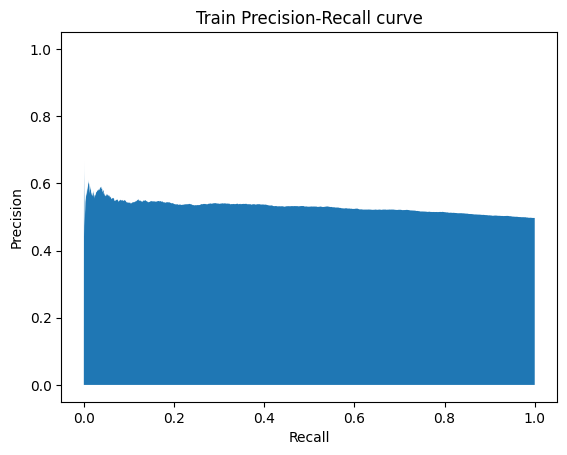

In [ ]:
import matplotlib.pyplot as plt
plt.fill_between(recall, precision)
plt.ylabel("Precision")
plt.xlabel("Recall")
plt.title("Train Precision-Recall curve")